In [1110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [1111]:
data=pd.read_csv('newdata.csv')

In [1112]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [1113]:
data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.00000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.00000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [1114]:
data.shape

(10841, 13)

In [1115]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [1116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [1117]:
#making the names of cols in lower case and one word names
data.columns=(col.replace(' ','_').lower() for col in data.columns)
column=data.columns
data.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [1118]:
#check the null values
data.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [1119]:
#drop the null records
data.dropna(subset=['rating'],inplace=True)
data=data.reset_index(drop=True)

In [1120]:
#check Android_ver null values
data.android_ver.isnull().sum()
data.reset_index

<bound method DataFrame.reset_index of                                                     app             category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9362                                      FR Calculator               FAMILY   
9363                                   Sya9a Maroc - FR               FAMILY   
9364                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9365                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9366      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   



In [1121]:
data[data.android_ver.isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


All 3 values contain NaN  

All the reords have same problem

In [1122]:
data=data.drop(data.index[9117])
data[data.android_ver.isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


The record has been dropped

Filling the remaining value with mode

In [1123]:
data.android_ver=data.android_ver.fillna(data.android_ver.mode()[0])
data[data.android_ver.isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


WHich all variable need to be brought to numeric types ?



In [1124]:
data.dtypes

app                object
category           object
rating            float64
reviews            object
size              float64
installs           object
type               object
price              object
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

from the above output we observe reviews, installs , price can be brought to numeric types

In [1125]:
data.price.sample(10)

3234        0
7222        0
5708        0
4345        0
1754    $5.99
7352        0
6519        0
7829        0
8869        0
5952        0
Name: price, dtype: object

In [1126]:
data.price=data.price.apply(lambda x: x.strip('$'))
data.price.sample(10)

2839        0
4205        0
7061        0
4206        0
5197        0
4040        0
2900    29.99
2337        0
8656        0
8123        0
Name: price, dtype: object

In [1127]:
data.price=data.price.astype(float)

In [1128]:
data.price.dtype

dtype('float64')

In [1129]:
data.reviews.sample(10)

434        15287
3833    23125280
1614      760628
7679          39
8700          44
1384      162243
3970       13096
5000           9
6603       13232
7716        2576
Name: reviews, dtype: object

In [1130]:
data.reviews.astype(int)

0          159
1          967
2        87510
3       215644
4          967
         ...  
9362         7
9363        38
9364         4
9365       114
9366    398307
Name: reviews, Length: 9366, dtype: int32

In [1131]:
data.reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [1132]:
data.installs.sample(10)

7234           10,000+
8740           10,000+
5144          100,000+
6534       10,000,000+
608               500+
5916           10,000+
2580        1,000,000+
3025        1,000,000+
2988    1,000,000,000+
8721          100,000+
Name: installs, dtype: object

In [1133]:
data.installs=data.installs.apply(lambda x: x .strip('+'))
data.installs=data.installs.apply(lambda x: x .strip(','))
data.installs

0           10,000
1          500,000
2        5,000,000
3       50,000,000
4          100,000
           ...    
9362           500
9363         5,000
9364           100
9365         1,000
9366    10,000,000
Name: installs, Length: 9366, dtype: object

In [1134]:
data.installs=data.installs.str.replace(',','')

In [1135]:
data.installs

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9362         500
9363        5000
9364         100
9365        1000
9366    10000000
Name: installs, Length: 9366, dtype: object

In [1136]:
data.installs=data.installs.astype(int)

In [1137]:
data.reviews=data.reviews.astype(int)

In [1138]:
data.dtypes

app                object
category           object
rating            float64
reviews             int32
size              float64
installs            int32
type               object
price             float64
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

In [1139]:
data.price=data.price.astype(float)

In [1140]:
data.dtypes

app                object
category           object
rating            float64
reviews             int32
size              float64
installs            int32
type               object
price             float64
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

Sanity checks:
average rating should be between 1 and 5 only so drop rest
    

In [1141]:
(data.rating<5).sum()

9092

In [1142]:
#data.rating=data.rating.between(1,5)

In [1143]:
data.rating.count()
data.rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Reviews should not be more than installs

In [1144]:
data=data[data['reviews']<data['installs']]

In [1145]:
data.shape
data.rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

outliers

In [1146]:
#boxplot
#plt.boxplot(data.price)
#plt.show()                                  3sns.set(rc={'figure.figsize':(20,10)})

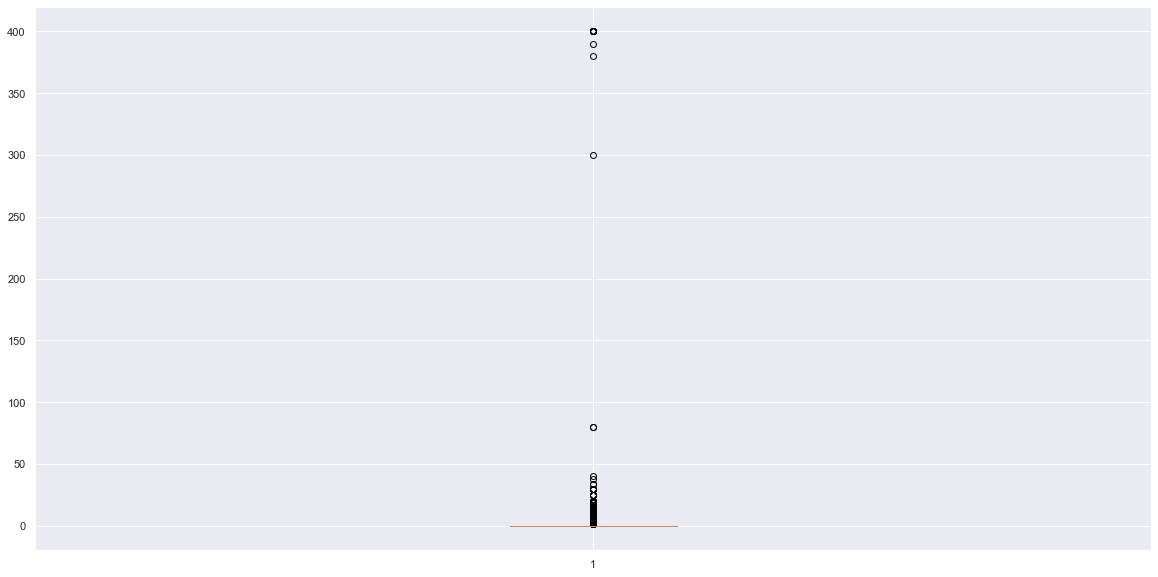

In [1147]:
sns.set(rc={'figure.figsize':(20,10)})
plt.boxplot(data.price)
plt.show()

In [1148]:
#removing app more than $200
data=data[data['price']<200]
data=data.reset_index(drop=True)

In [1149]:
data.shape

(9342, 13)

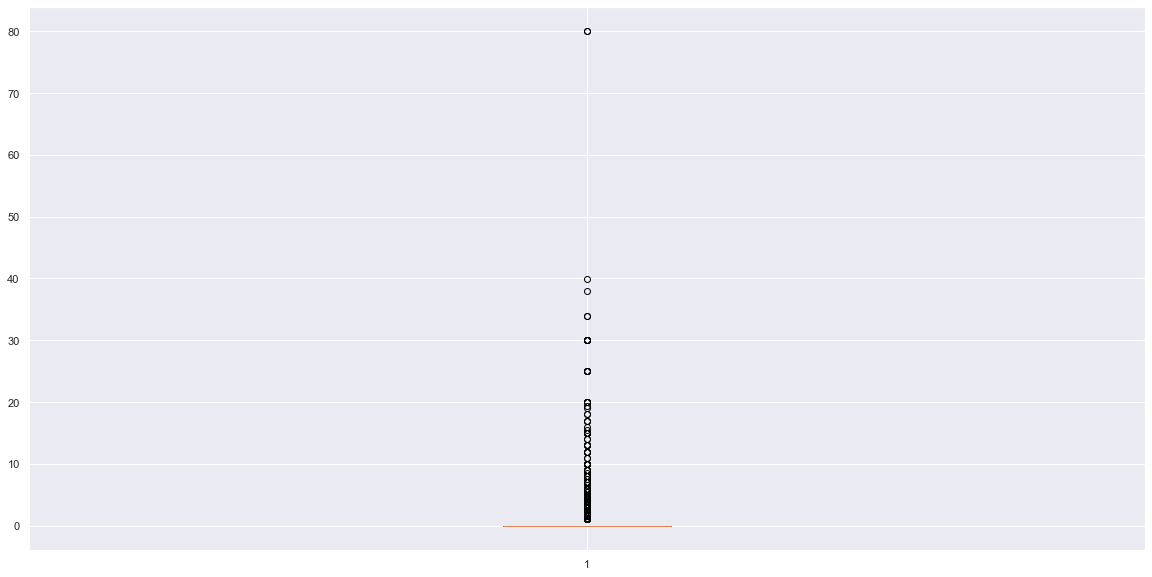

In [1150]:
plt.boxplot(data.price)
plt.show();

In [1151]:
data=data[data['price']<30]
data=data.reset_index(drop=True)

In [1152]:
data.shape

(9336, 13)

Reviews columns

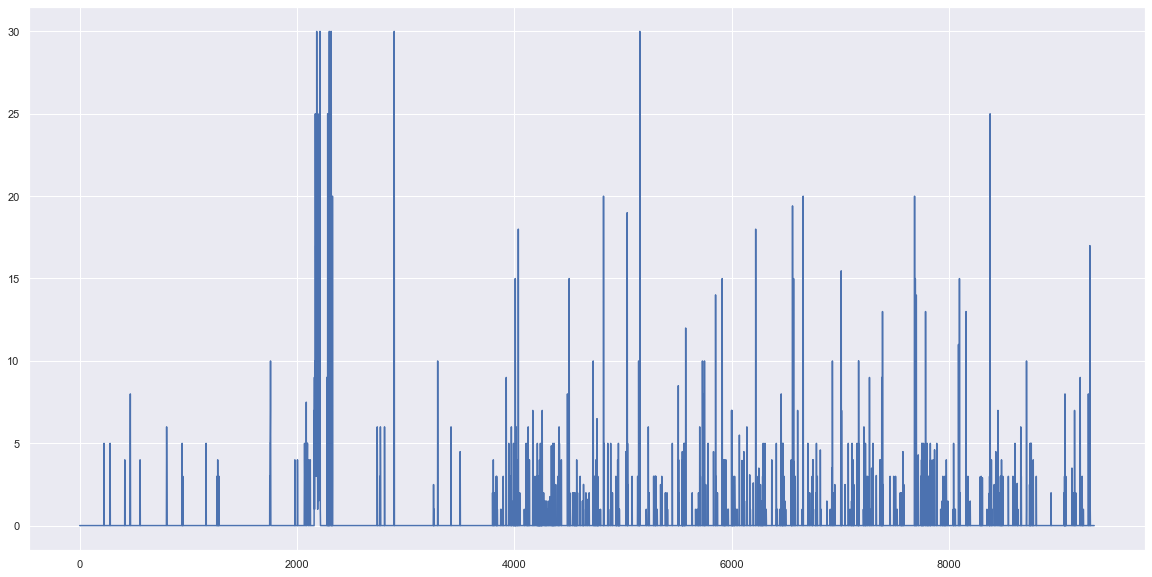

In [1153]:
sns.lineplot(data=data.price);

Limit data to apps with < 1 Million reviews

In [1154]:
data=data[data['reviews']<1000000]
data=data.reset_index(drop=True)
data.shape

(8632, 13)

Installs

In [1155]:
percentile=data['installs'].quantile(0.95)
percentile

10000000.0

In [1156]:
#Drop records having a value more than the 95th percentile

data=data[data['installs']<percentile]
data=data.reset_index(drop=True)

In [1157]:
data.shape
data.rating.unique()

array([4.1, 3.9, 4.7, 4.3, 4.4, 3.8, 4.6, 3.2, 4.5, 4. , 4.8, 4.2, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?

In [1158]:
skew_value=data['rating'].skew(axis=0)
skew_value

-1.638194939309568

The skew value for rating is negative : -1.6

In [1159]:
data.rating.unique()

array([4.1, 3.9, 4.7, 4.3, 4.4, 3.8, 4.6, 3.2, 4.5, 4. , 4.8, 4.2, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

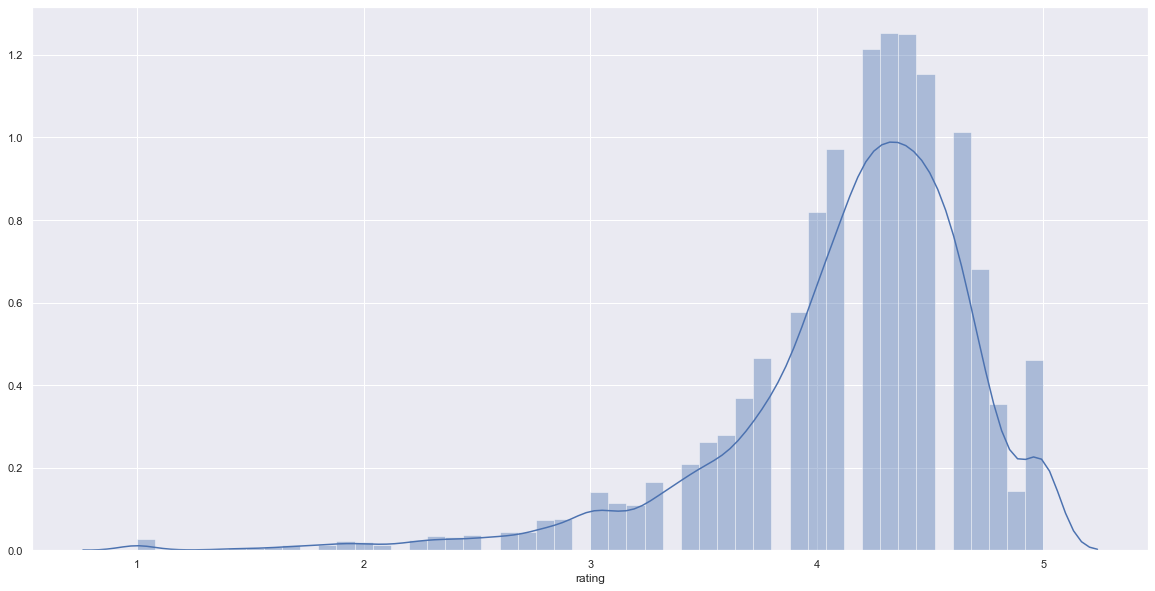

In [1160]:
sns.distplot(data['rating'],hist=True,label="Rating skewness");

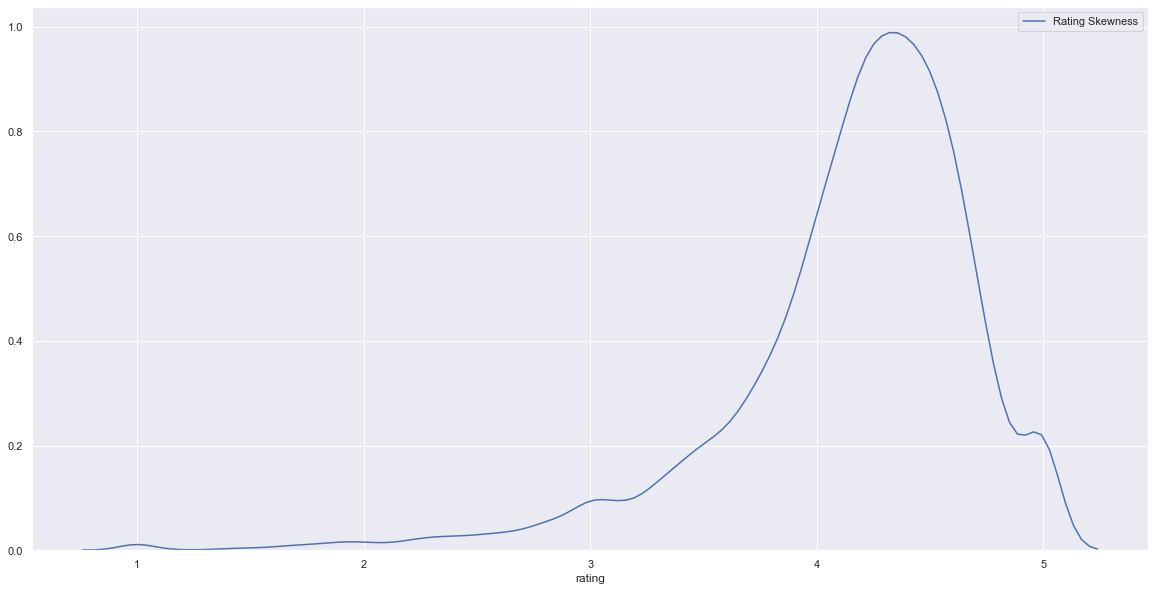

In [1161]:
sns.distplot(data['rating'],hist=False,label="Rating Skewness");

# Inference:

maximum apps have ratings as 4 and 3 

moderate number of apps have ratings in range of 3 to 4

less apps have ratings as 5

less apps have ratings as 2

very less apps have rating as 1 

Zero apps have rating 1.5 , 2.5, 3.5 and 4.5

    







Top content ratings:

In [1162]:
data.content_rating.unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [1163]:
data.content_rating.value_counts()

Everyone           5911
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: content_rating, dtype: int64

Are there any entries with very few records?

yes: Adults only 18+ and Unrated

Drop those:

In [1164]:
data=data[data['content_rating']!='Adults only 18+']
data.reset_index(drop=True,inplace=True)
data.content_rating.value_counts()

Everyone        5911
Teen             746
Mature 17+       346
Everyone 10+     249
Unrated            1
Name: content_rating, dtype: int64

In [1165]:
data=data[data['content_rating']!='Unrated']
data.reset_index(drop=True,inplace=True)
data.content_rating.value_counts()

Everyone        5911
Teen             746
Mature 17+       346
Everyone 10+     249
Name: content_rating, dtype: int64

Effect of Size on Rating :

In [1166]:
data.rating.size

7252

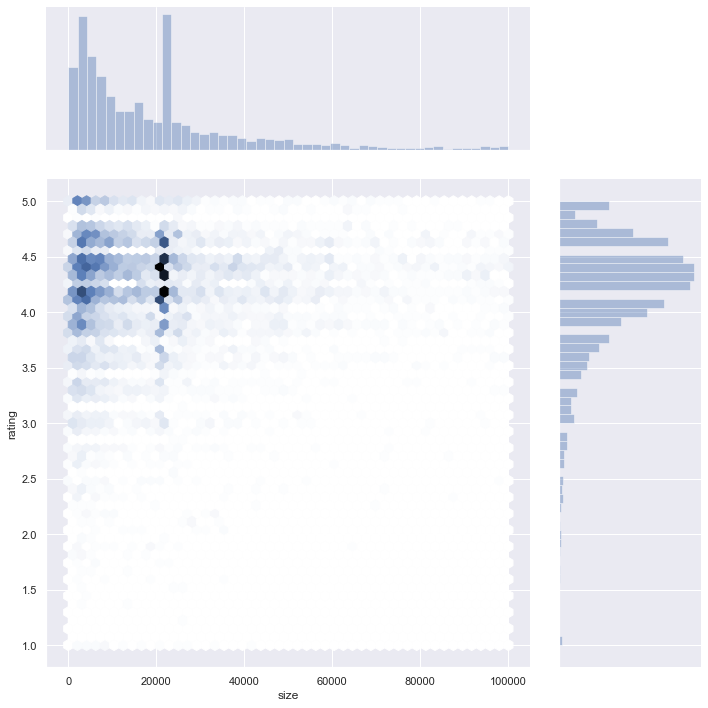

In [1167]:
sns.jointplot(x='size',y='rating',data=data,kind='hex',height=10,ratio=3);


from matplotlib import rcParams
sns.set(rc={'figure.figsize':(30,20)})

Do you see any patterns ?

yes.. there are patterns

# Inference:



The  max apps with Rating as 4 have size between 0 to 40000

and max apps with rating as 3 are between size 0 to 20000


Behaviour of Apps with Rating 4:

At location (20000,4.0)  we have highest density and the density goes on decreasing as size increases



Behaviour of apps with Rating 3:

At location (20000,3) we have highest density and the density goes on deacreasing as size increases


Maximum apps have size in range of 0 to 40000
maximum apps have ratings in range of 3 to 4


 






EFFECT OF PRICE ON RATING :

In [1170]:
#sns.jointplot(x='price',y='rating', data=data ,kind='reg');
#data.price.sample(10)




#g = sns.jointplot("petal_length", "sepal_length", data=iris,
                 # marginal_kws=dict(bins=15, rug=True),
                  #annot_kws=dict(stat="r"),
                  #s=40, edgecolor="w", linewidth=1)


In [1171]:
data=data[data['price']>0]

In [1172]:
data.price.sample(10)

4787    3.90
7070    1.99
1486    2.99
7151    2.99
6449    6.99
2455    1.70
4333    3.95
4769    0.99
6017    0.99
5498    3.99
Name: price, dtype: float64

In [1173]:
data.price.unique()

array([ 4.99,  3.99,  6.99,  7.99,  5.99,  2.99,  3.49,  1.99,  9.99,
        7.49,  0.99,  9.  ,  5.49, 10.  , 24.99, 11.99, 16.99, 14.99,
       29.99, 12.99,  2.49, 10.99,  1.5 , 19.99, 15.99,  3.95,  4.49,
        1.7 ,  8.99,  1.49,  3.88, 17.99,  3.02,  1.76,  4.84,  4.77,
        1.61,  2.5 ,  1.59,  6.49,  1.29, 18.99,  8.49,  1.75, 14.  ,
        2.  ,  3.08,  2.59, 19.4 ,  3.9 ,  4.59, 15.46,  3.04, 13.99,
        4.29,  3.28,  4.6 ,  1.  ,  2.95,  2.9 ,  1.97,  2.56,  1.2 ])

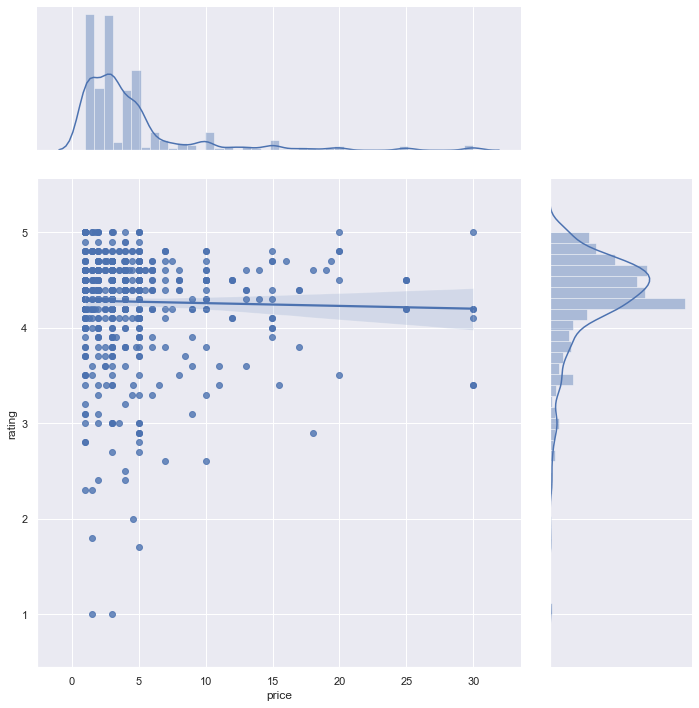

In [1174]:
sns.jointplot(x='price',y='rating',data=data,kind='reg',height=10,ratio=3);

In [1175]:
data.rating.unique()

array([4.7, 4.8, 4. , 4.2, 2.6, 3.5, 4.9, 4.6, 4.1, 4.4, 4.5, 4.3, 3. ,
       3.9, 3.2, 3.8, 2.5, 5. , 3.4, 3.6, 1. , 1.8, 3.3, 3.7, 2.9, 2.8,
       2.7, 2.4, 3.1, 1.7, 2. , 2.3])

In [1176]:
data.price=data.price.astype(int)

C:\Users\Pradnya\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1177]:
data.price.dtype

dtype('int32')

In [1178]:
#sns.jointplot(x='price',y='rating',data=df,kind='reg')

In [1179]:
data.dtypes

app                object
category           object
rating            float64
reviews             int32
size              float64
installs            int32
type               object
price               int32
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

In [1080]:
#data.rating=data.rating.astype()
data

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
189,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
190,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
238,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
239,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
301,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.52952,100000,Paid,3,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,Fruit Ninja Classic,GAME,4.3,85468,36000.00000,1000000,Paid,0,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
7161,FO Bixby,PERSONALIZATION,5.0,5,861.00000,100,Paid,0,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
7200,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.00000,1000,Paid,7,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
7213,Trine 2: Complete Story,GAME,3.8,252,11000.00000,10000,Paid,16,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [1081]:
data=data[data['price']>0]

In [1082]:
data

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
189,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
190,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
238,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
239,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
301,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.52952,100000,Paid,3,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,Football Manager Mobile 2018,SPORTS,3.9,11460,21516.52952,100000,Paid,8,Everyone,Sports,"June 27, 2018",Varies with device,4.1 and up
7151,Solitaire+,GAME,4.6,11235,21516.52952,100000,Paid,2,Everyone,Card,"July 30, 2018",Varies with device,Varies with device
7200,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.00000,1000,Paid,7,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
7213,Trine 2: Complete Story,GAME,3.8,252,11000.00000,10000,Paid,16,Teen,Action,"February 27, 2015",2.22,5.0 and up


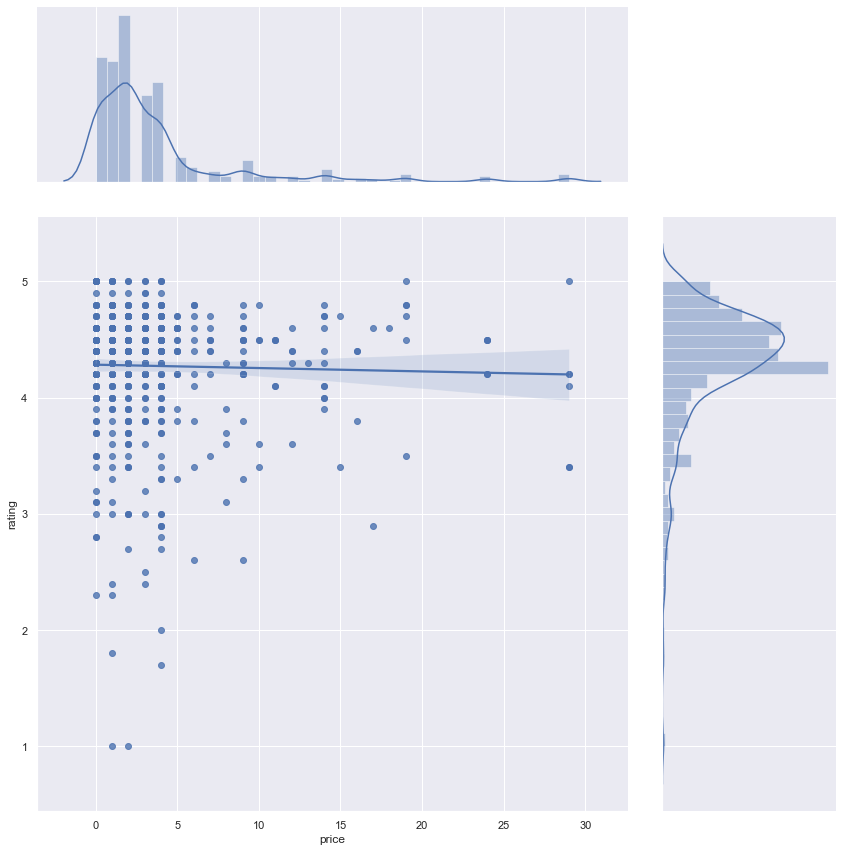

In [1180]:
sns.jointplot(x='price',y='rating',data=data,kind='reg',height=12,ratio=3);

In [1181]:
data.isna().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
genres            0
last_updated      0
current_ver       1
android_ver       0
dtype: int64

In [1182]:
#sns.jointplot(x='price',y='rating',data=data,kind='reg',height=12,ratio=10);

pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

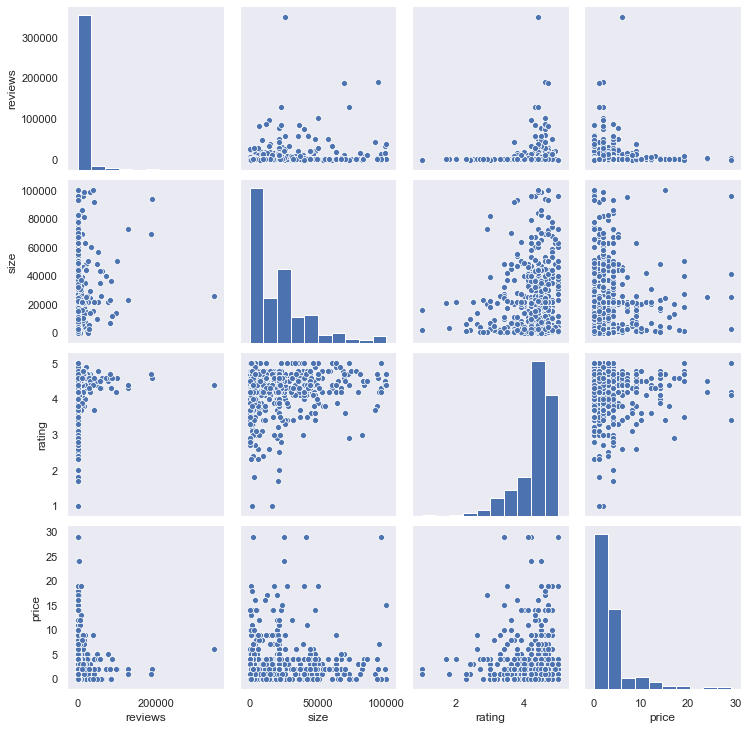

In [1183]:
sns.set(style='dark',color_codes=True)
sns.pairplot(data=data[['reviews','size','rating','price']]);

Rating vs. content rating

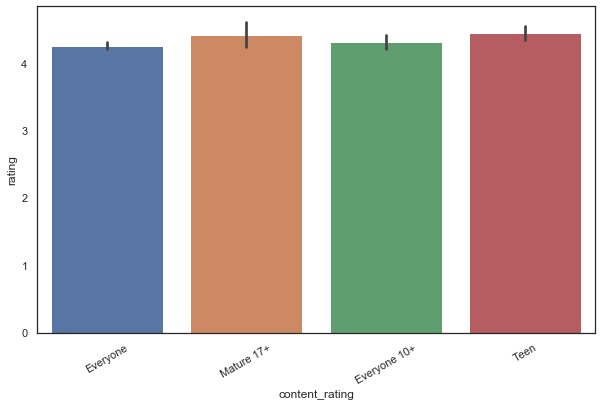

In [1184]:
plt.figure(figsize=(10,6))
sns.set(style='white')
sns.barplot(x='content_rating',y='rating',data=data);
plt.xlabel('content_rating')
plt.ylabel('rating')  

plt.xticks(rotation=30, horizontalalignment="center");

we will use Median

In [1185]:
data.groupby(['content_rating'])['rating'].median()

content_rating
Everyone        4.40
Everyone 10+    4.40
Mature 17+      4.45
Teen            4.50
Name: rating, dtype: float64

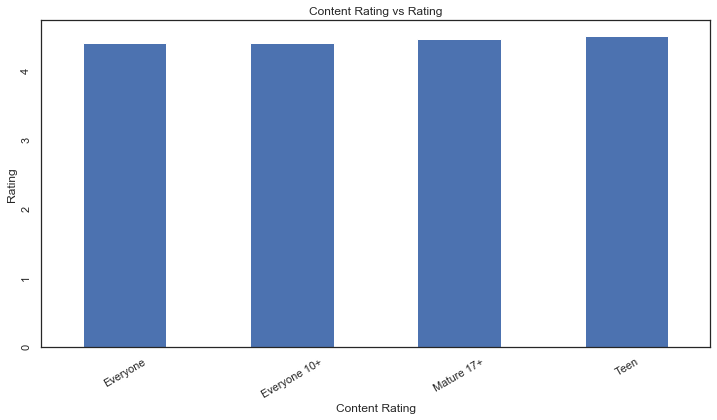

In [1186]:
plt.figure(figsize=(12,6))
ax=data.groupby('content_rating')['rating'].median()
ax.plot(kind='bar');
plt.title('Content Rating vs Rating')
plt.xlabel('Content Rating')
plt.xticks(rotation=30, horizontalalignment="center")
plt.yticks(rotation=90, verticalalignment="center")
plt.ylabel('Rating');

Content rating vs. size vs. rating – 3 variables at a time

Create 5 buckets (20% records in each) based on Size



In [1187]:
data.rating

189     4.7
190     4.8
238     4.7
239     4.8
301     4.0
       ... 
7154    4.3
7161    5.0
7200    4.4
7213    3.8
7215    4.2
Name: rating, Length: 620, dtype: float64

In [1188]:
bucket=pd.qcut(data['size'],q=5)

data.reset_index(drop=True)
bucket.head()
#data.head()

189       (2900.0, 8600.0]
190    (36000.0, 100000.0]
238       (2900.0, 8600.0]
239    (36000.0, 100000.0]
301     (8600.0, 21516.53]
Name: size, dtype: category
Categories (5, interval[float64]): [(13.999, 2900.0] < (2900.0, 8600.0] < (8600.0, 21516.53] < (21516.53, 36000.0] < (36000.0, 100000.0]]

In [1189]:
data['bucket_size']=pd.qcut(data['size'],q=[0,0.2,0.4,0.6,0.8,1])
data['bucket_size']

C:\Users\Pradnya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


189        (2900.0, 8600.0]
190     (36000.0, 100000.0]
238        (2900.0, 8600.0]
239     (36000.0, 100000.0]
301      (8600.0, 21516.53]
               ...         
7154    (21516.53, 36000.0]
7161       (13.999, 2900.0]
7200       (13.999, 2900.0]
7213     (8600.0, 21516.53]
7215     (8600.0, 21516.53]
Name: bucket_size, Length: 620, dtype: category
Categories (5, interval[float64]): [(13.999, 2900.0] < (2900.0, 8600.0] < (8600.0, 21516.53] < (21516.53, 36000.0] < (36000.0, 100000.0]]

In [1190]:
data

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,bucket_size
189,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,"(2900.0, 8600.0]"
190,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,"(36000.0, 100000.0]"
238,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,"(2900.0, 8600.0]"
239,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,"(36000.0, 100000.0]"
301,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.52952,100000,Paid,3,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,"(8600.0, 21516.53]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,Fruit Ninja Classic,GAME,4.3,85468,36000.00000,1000000,Paid,0,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,"(21516.53, 36000.0]"
7161,FO Bixby,PERSONALIZATION,5.0,5,861.00000,100,Paid,0,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,"(13.999, 2900.0]"
7200,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.00000,1000,Paid,7,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,"(13.999, 2900.0]"
7213,Trine 2: Complete Story,GAME,3.8,252,11000.00000,10000,Paid,16,Teen,Action,"February 27, 2015",2.22,5.0 and up,"(8600.0, 21516.53]"


In [1192]:
#data.bucket_size.unique()
g=data.groupby(['content_rating','bucket_size'])['rating'].transform (lambda x: pd.qcut(x,5,labels=False,duplicates='drop'))
print(g)

189     3.0
190     4.0
238     3.0
239     4.0
301     0.0
       ... 
7154    1.0
7161    4.0
7200    2.0
7213    0.0
7215    1.0
Name: rating, Length: 620, dtype: float64


In [1193]:
data.groupby(['content_rating','bucket_size'])['rating'].sum()


content_rating  bucket_size        
Everyone        (13.999, 2900.0]       513.8
                (2900.0, 8600.0]       458.7
                (8600.0, 21516.53]     618.7
                (21516.53, 36000.0]    259.5
                (36000.0, 100000.0]    399.1
Everyone 10+    (13.999, 2900.0]         4.4
                (2900.0, 8600.0]        21.0
                (8600.0, 21516.53]      39.9
                (21516.53, 36000.0]     46.6
                (36000.0, 100000.0]     21.8
Mature 17+      (13.999, 2900.0]         NaN
                (2900.0, 8600.0]         NaN
                (8600.0, 21516.53]      20.6
                (21516.53, 36000.0]     27.3
                (36000.0, 100000.0]     22.7
Teen            (13.999, 2900.0]         5.0
                (2900.0, 8600.0]        44.0
                (8600.0, 21516.53]      35.3
                (21516.53, 36000.0]     18.9
                (36000.0, 100000.0]     92.4
Name: rating, dtype: float64

In [1195]:
g.unique()
g.dropna()

189     3.0
190     4.0
238     3.0
239     4.0
301     0.0
       ... 
7154    1.0
7161    4.0
7200    2.0
7213    0.0
7215    1.0
Name: rating, Length: 618, dtype: float64

In [1197]:
g.sample(10)

6022    0.0
2519    1.0
5824    1.0
4268    1.0
5595    3.0
2137    1.0
1414    3.0
6571    4.0
1483    1.0
4942    0.0
Name: rating, dtype: float64

In [1198]:
#ata.groupby(['content_rating','bucket_size'])['rating'].sum()

In [1109]:
#g=data.groupby(['content_rating','bucket_size'])['rating'].transform (lambda x: pd.qcut(x,5,labels=False,duplicates='drop'))
#print(g)

In [1108]:
data.reset_index(drop=True,inplace=True)

In [1103]:
data

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,bucket_size
0,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,"(3100.0, 8820.0]"
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,"(35000.0, 100000.0]"
2,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,"(3100.0, 8820.0]"
3,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,"(35000.0, 100000.0]"
4,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.52952,100000,Paid,3,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,"(8820.0, 21516.53]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Football Manager Mobile 2018,SPORTS,3.9,11460,21516.52952,100000,Paid,8,Everyone,Sports,"June 27, 2018",Varies with device,4.1 and up,"(8820.0, 21516.53]"
511,Solitaire+,GAME,4.6,11235,21516.52952,100000,Paid,2,Everyone,Card,"July 30, 2018",Varies with device,Varies with device,"(8820.0, 21516.53]"
512,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.00000,1000,Paid,7,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,"(16.999, 3100.0]"
513,Trine 2: Complete Story,GAME,3.8,252,11000.00000,10000,Paid,16,Teen,Action,"February 27, 2015",2.22,5.0 and up,"(8820.0, 21516.53]"


# make a heat map

In [1199]:
sns.set()

In [1202]:
b=data.pivot_table(values='size',index='content_rating',columns='rating')

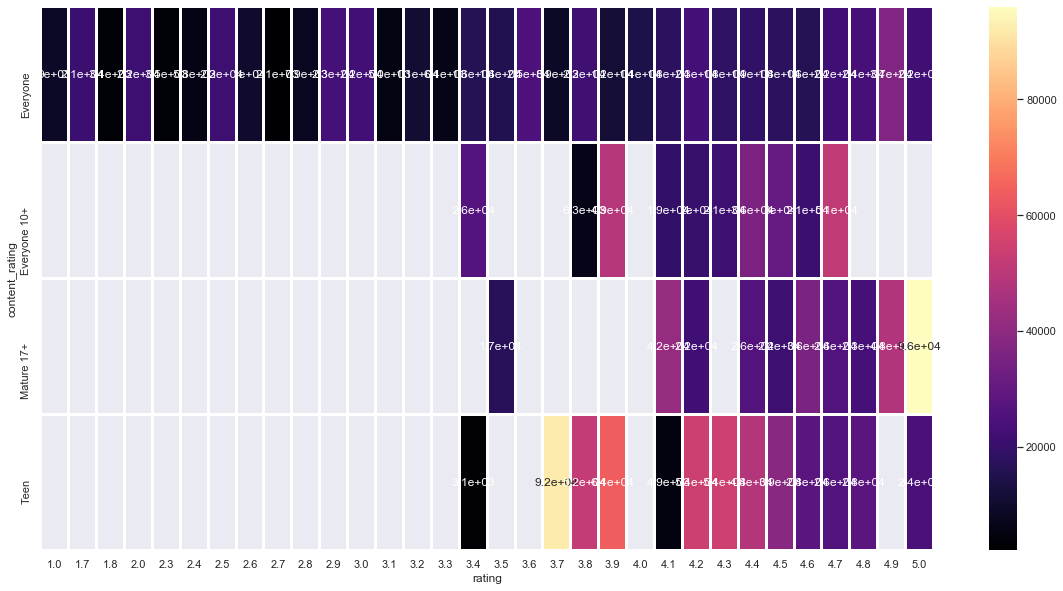

In [1217]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(b,annot=True,cmap='magma',linewidth=2,ax=ax);

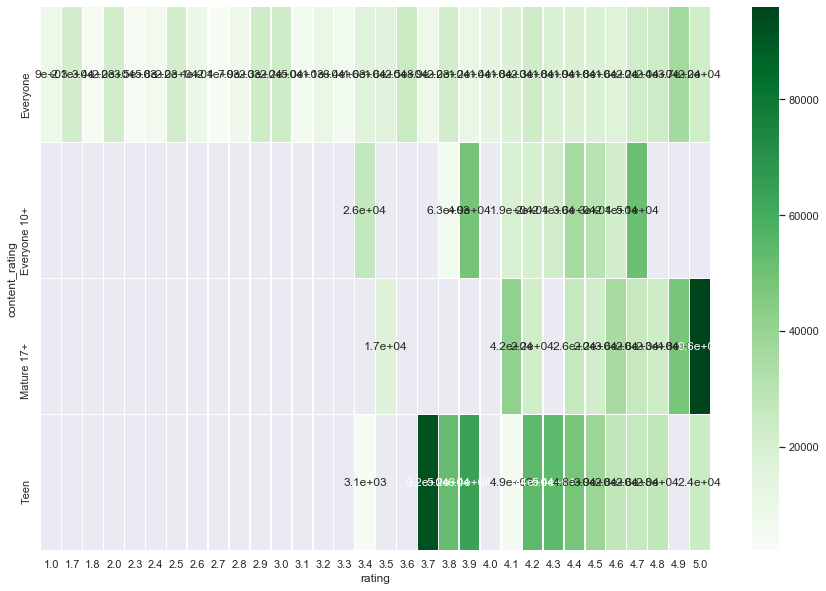

In [1235]:
b=data.pivot_table(values='size',index='content_rating',columns='rating')

fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(b,annot=True,cmap='Greens',linewidth=.5,ax=ax);

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Yes,lighter apps are preferred in all categories


Heavier apps are preferred mostly by Teen and mature 17+ categories


Teen category preferrs a wide range of apps with respect to size( light,heavy)



Everyone category has least preference to heavier apps as compared to other categories


